#

In [1]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

import sys
!{sys.executable} -m pip install pandas seaborn

In [28]:
#Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [29]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [30]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [31]:
#Explore columns
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [32]:
#Description
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [33]:
# Checking data types for each column
data.dtypes

id                       int64
region                  object
latitude               float64
longitude              float64
accommodation_type      object
cost                     int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
owner_id                 int64
owned_hotels             int64
yearly_availability      int64
dtype: object

In [34]:
# Checking if any column have nulls
data.isnull().sum(axis=0)

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

#### Filling nulls in the reviews_per_month column with 0. This is because, this column may be highly valuable as feature, and these rows with nulls cannot be ignored since all other columns have some value. reviews per month may indicate would be dependent on how many people visited the place. i.e. If more people visited the hotel, more chances that they may write a review and hence, it also means that the hotel might be less available yearly due to demand.

In [250]:
data.reviews_per_month = data.reviews_per_month.fillna(0)

In [36]:
# Converting the categorical column values to independent columns with values 0 and 1
data  = pd.get_dummies(data, drop_first =True)
data

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Private room,accommodation_type_Shared room
0,13232,40.71854,-74.00439,170,5,7,0.56,929983,1,0,0,1,0,0,0,0
1,246,40.64446,-73.95030,65,3,238,2.30,281764,1,0,1,0,0,0,0,0
2,19091,40.78573,-73.81062,85,1,0,0.00,19923341,1,1,0,0,1,0,1,0
3,34305,40.73863,-73.98002,210,30,0,0.00,200380610,65,1,0,1,0,0,1,0
4,444,40.82426,-73.94630,75,3,38,0.42,745069,3,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,47852,40.74316,-73.98038,400,2,0,0.00,270096906,1,1,0,1,0,0,1,0
2866,21978,40.73523,-73.99465,180,3,2,0.07,97266110,1,1,0,1,0,0,1,0
2867,23485,40.76619,-73.98987,179,3,17,0.67,10903067,1,0,0,1,0,0,0,0
2868,16757,40.74637,-73.97207,200,30,0,0.00,2856748,49,1,0,1,0,0,1,0


In [165]:
# removing non-relevant fields - these may not be usefull for model training
train_data = data.drop(['id','latitude','longitude','owner_id'], axis = 1)

## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [225]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


#### Transforming and cleaning test data

In [226]:
test_data.isnull().sum(axis=0)

id                      0
region                  0
latitude                0
longitude               0
accommodation_type      0
cost                    0
minimum_nights          0
number_of_reviews       0
reviews_per_month     173
owner_id                0
owned_hotels            0
dtype: int64

In [227]:
test_data.reviews_per_month = test_data.reviews_per_month.fillna(0)

In [228]:
test_data  = pd.get_dummies(test_data, drop_first =True)

In [231]:
test_data_feature = test_data.drop(['id','latitude','longitude','owner_id'], axis = 1)

In [232]:
test_data_feature

,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Private room,accommodation_type_Shared room
0,135,2,22,0.66,1,1,0,0,0,0,1
1,69,2,8,0.90,2,1,0,0,0,0,0
2,225,30,0,0.00,12,0,1,0,0,1,0
3,125,30,9,0.82,1,0,1,0,0,0,1
4,43,1,13,0.72,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
713,77,2,36,1.81,1,0,0,0,0,0,0
714,145,3,43,1.36,1,1,0,0,0,0,0
715,90,2,60,4.35,1,0,1,0,0,0,0
716,200,30,0,0.00,23,0,1,0,0,1,0


#### Checking Correlation between features

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_df = train_data.corr()
corr_df

,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Private room,accommodation_type_Shared room
cost,1.000000,0.052918,-0.074432,-0.123086,0.032185,0.147576,-0.084543,0.141398,-0.066359,0.003322,0.126273,-0.020195
minimum_nights,0.052918,1.000000,-0.088767,-0.139803,0.107893,0.173550,-0.045813,0.071547,-0.026489,-0.006379,0.166778,-0.049767
number_of_reviews,-0.074432,-0.088767,1.000000,0.576553,-0.112328,-0.191645,0.053843,-0.032103,-0.026691,-0.028090,-0.177441,-0.082181
reviews_per_month,-0.123086,-0.139803,0.576553,1.000000,-0.147011,-0.312213,0.021694,-0.042358,0.022218,-0.007715,-0.300600,-0.010960
owned_hotels,0.032185,0.107893,-0.112328,-0.147011,1.000000,0.191906,-0.156839,0.209776,-0.064695,-0.017487,0.138570,-0.048646
yearly_availability,0.147576,0.173550,-0.191645,-0.312213,0.191906,1.000000,-0.079190,-0.019062,0.094650,0.050205,0.690654,-0.081234
region_Brooklyn,-0.084543,-0.045813,0.053843,0.021694,-0.156839,-0.079190,1.000000,-0.720693,-0.297716,-0.054182,-0.092917,0.029619
region_Manhattan,0.141398,0.071547,-0.032103,-0.042358,0.209776,-0.019062,-0.720693,1.000000,-0.358269,-0.065202,0.031126,-0.024543
region_Queens,-0.066359,-0.026489,-0.026691,0.022218,-0.064695,0.094650,-0.297716,-0.358269,1.000000,-0.026935,0.048503,0.015223
region_Staten Island,0.003322,-0.006379,-0.028090,-0.007715,-0.017487,0.050205,-0.054182,-0.065202,-0.026935,1.000000,0.050801,-0.025627


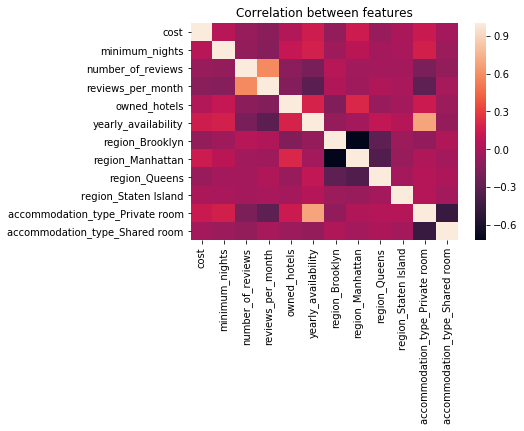

In [235]:
ax = plt.axes()
sns.heatmap(corr_df, ax = ax)
ax.set_title('Correlation between features')
plt.show()



**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

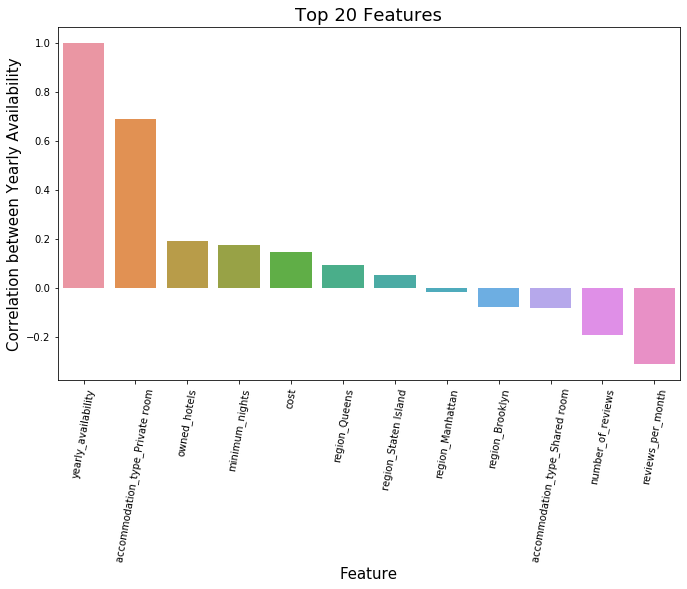

In [236]:
corr_df_viz = corr_df
corr_df_viz['feature'] = corr_df_viz.index

plt.figure(figsize=(10,6))
# make barplot
sns.barplot(x='feature',
            y="yearly_availability", 
            data=corr_df_viz, 
            order=corr_df_viz.sort_values('yearly_availability', ascending = False).feature)
# set labels
plt.xlabel("Feature", size=15)
plt.ylabel("Correlation between Yearly Availability", size=15)
plt.title("Top 20 Features", size=18)
plt.tight_layout()
plt.xticks(rotation=80)

#### The above Graph shows us that the accomodation type, minimum nights a person stays, cost and region are positively correlated whereas features like number_of_reviews, reviews_per_month are negatively correlated, i.e. if these numbers are more, yearly availability is less probable to be 1.

### Creating the model

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
import numpy as np

Text(0.5, 0, 'Class (1==Availability)')

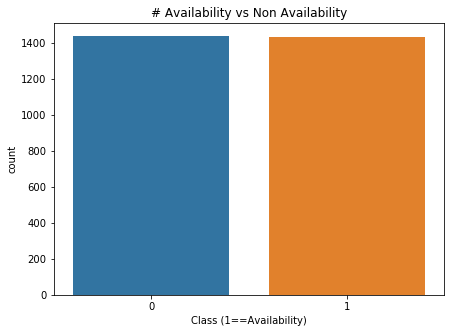

In [239]:
# Checking distribution of yearly_availability column in the training data
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='yearly_availability', data=train_data)
plt.title('# Availability vs Non Availability')
plt.xlabel('Class (1==Availability)')

### Since we have comparable number of records for both the classes, we can use the accuracy metrics for performance.

In [240]:
# Splitting data to train and test
np.random.seed(42)
X = train_data.drop(['yearly_availability'
                    ], axis = 1)
y = train_data['yearly_availability']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [241]:
# Using Logistic regression for Binary Classification
scaler = StandardScaler()
lr = LogisticRegression(solver = 'lbfgs')
model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])

In [242]:
model1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [243]:
# Accuracy for Train Split
y_train_h = model1.predict(X_train)
y_train_h_probs = model1.predict_proba(X_train)[:,1]

train_accuracy = accuracy_score(y_train, y_train_h)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_h))

print('Training accuracy: %.4f %%' % train_accuracy)

Confusion matrix:
 [[945 137]
 [169 901]]
Training accuracy: 85.7807 %


In [251]:
# Accuracy for Test Split
y_test_h = model1.predict(X_test)
y_test_h_probs = model1.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_test_h)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_h))

print('Testing accuracy: %.4f %%' % test_accuracy) 

Confusion matrix:
 [[313  44]
 [ 56 305]]
Testing accuracy: 86.0724 %


In [245]:
print(classification_report(y_test, y_test_h, digits=5))

              precision    recall  f1-score   support

           0    0.84824   0.87675   0.86226       357
           1    0.87393   0.84488   0.85915       361

    accuracy                        0.86072       718
   macro avg    0.86108   0.86081   0.86071       718
weighted avg    0.86115   0.86072   0.86070       718



> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [247]:
# Combining prediction results to IDs.
pred_list = list(model1.predict(test_data_feature))
pred_id = list(test_data['id'])
submission_df = pd.DataFrame(list(zip(pred_list,pred_id )), columns = ['id','yearly_availability'])

In [248]:
submission_df

,id,yearly_availability
0,0,19215
1,0,36301
2,1,40566
3,0,33694
4,0,28873
...,...,...
713,0,26801
714,0,20110
715,0,31383
716,1,47135


In [249]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---